In [668]:
import numpy as np
import sys
sys.path.append('./../')
from binary import *
from makePop_while import *
import matplotlib.pyplot as plt
from scipy.special import erf
import matplotlib as mpl

mpl.rcParams['hatch.linewidth'] = 0.3
plt.rc('text', usetex=True)
plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

In [669]:
# Madau & Dickinson SFR at z=0
SFR = 1e-1 # Msun/yr/Mpc^3

# Convert to Msun/yr/Gpc^3
SFR *= 1e9

Assume a Salpeter IMF, normalized above 0.5 Msun:

$$
\frac{dP}{dm} = \frac{-(1+\lambda)}{(0.5\,M_\odot)^{1+\lambda}} m^\lambda
$$

with $\lambda=-2.35$. Note that the SFR ($\frac{dM}{dtdV}$) is related to the number density $\frac{dN}{dtdV}$ by

$$
\begin{aligned}
\frac{dM}{dt\,dV} &= \int dM \frac{dN}{dt\,dV\,dM} M \\
&= \int dM \frac{dN}{dt\,dV} \frac{dP}{dm} M,
\end{aligned}
$$

So

$$
\frac{dN}{dt\,dV} = \frac{\frac{dM}{dt\,dV}}{\int dM p(M) M}
$$

Now, the number of stars formed per mass interval $dM$ is

$$
\begin{aligned}
\frac{dN}{dt\,dV\,dM} &= \frac{dN}{dt\,dV} p(M) \\
&= p(M) \frac{\frac{dM}{dt\,dV}}{\int dM' p(M') M'}
\end{aligned}
$$

Hence the number density of high-mass stellar formation is

$$
\frac{dN}{dt\,dV}_{\mathrm{high}} = \frac{dM}{dt\,dV} \frac{\int_\mathrm{high}dM' p(M')}{\int dM'' p(M'') M''}
$$

In [291]:
# Salpeter IMF, normalized above 0.5 Msun
all_masses = np.linspace(0.5,1000.,10000)
p_ms_all = (1.-2.35)*all_masses**(-2.35)/(0.-0.5**(1.-2.35))

high_masses = np.linspace(30,1000.,10000)
p_ms_high = (1.-2.35)*high_masses**(-2.35)/(0.-0.5**(1.-2.35))

rate_highMass = SFR*np.trapz(p_ms_high,high_masses)/np.trapz(all_masses*p_ms_all,all_masses)
print(rate_highMass)

219370.36334316604


Conservatively assume a binary fraction of 1. Note that this **overestimates** the rate of high-mass binary production, hence **underestimating** the net BBH merger efficiency

In [292]:
rate_highMass_binaries = rate_highMass/2.
print(rate_highMass_binaries)

109685.18167158302


If the observed BBH merger rate is $20\,\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}$, then the overall efficiency $f$ with which high-mass stellar binaries yield BBH mergers is the following:

In [293]:
net_efficiency = 20./(rate_highMass_binaries)
print(net_efficiency)

0.00018234003623099758


---
# Random Pairing

Assume a Salpeter IMF, normalized above 0.5 Msun:

$$
\frac{dP}{dm} = \frac{-(1+\lambda)}{(0.5\,M_\odot)^{1+\lambda}} m^\lambda
$$

with $\lambda=-2.35$.

If all stars are in binaries, then the SFR ($\frac{dM}{dtdV}$) is related to the binary number density $\frac{dN_b}{dtdV}$ by

$$
\begin{aligned}
\frac{dM}{dt\,dV} &= \int dm_1 \int dm_2 \frac{dN_b}{dt\,dV\,dm_1\,dm_2} (m_1+m_2) \\
&= \int dm_1 \int dm_2 \frac{dN_b}{dt\,dV} \frac{dP}{dm_1} \frac{dP}{dm_2} (m_1+m_2) \\
&= \frac{dN_b}{dt\,dV}  \int dm_1 \int dm_2 \frac{dP}{dm_1} \frac{dP}{dm_2} (m_1+m_2)
\end{aligned}
$$

So

$$
\frac{dN_b}{dt\,dV} = \frac{\frac{dM}{dt\,dV}}{\int dm_1 \int dm_2 \,p(m_1) p(m_2) (m_1+m_2)}
$$

Now, the number of binaries formed per component mass interval $dm_1$ and $dm_2$ is

$$
\begin{aligned}
\frac{dN_b}{dt\,dV\,dm_1\,dm_2} &= \frac{dN_b}{dt\,dV} p(m_1) p(m_2) \\
&= p(m_1) p(m_2) \,\frac{\frac{dM}{dt\,dV}}{\int dm_1' \int dm_2' \, p(m_1') p(m_2') (m_1'+m_2')}
\end{aligned}
$$

Hence the number density of binaries in which *both* components have "high" masses above some threshold is

$$
\begin{aligned}
\frac{dN}{dt\,dV}_{\mathrm{high}} &= \frac{dM}{dt\,dV} \frac{\int_\mathrm{high}dm_1' \int_\mathrm{high} dm_2' \, p(m_1') p(m_2')}{\int d m_1'' dm_2'' p(m_1'') p(m_2'') (m_1''+m_2'')} \\
&= \frac{dM}{dt\,dV} \frac{\left( \int_\mathrm{high}dm' \, p(m_1')\right)^2}{\int d m_1'' dm_2'' p(m_1'') p(m_2'') (m_1''+m_2'')}
\end{aligned}
$$

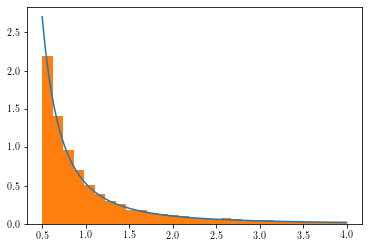

In [24]:
fig,ax = plt.subplots()

ms = np.linspace(0.5,4,100)
ax.plot(ms, (1.-2.35)*ms**(-2.35)/(0.-0.5**(1.-2.35)))

randMs = 0.5*np.power(np.random.random(10000),1./(1.-2.35))
ax.hist(randMs,density=True,bins=np.linspace(0.5,4,30))

plt.show()

In [297]:
Ntot = 1000000
m1s = 0.5*np.power(np.random.random(Ntot),1./(1.-2.35))
m2s = 0.5*np.power(np.random.random(Ntot),1./(1.-2.35))

nHeavy = np.where((m1s>20.) & (m2s>20.))[0].size

totalMass = np.sum(m1s) + np.sum(m2s)
time = totalMass/SFR
nHeavy/time

1162.343811078894

In [295]:
Ntot = 1000000
m1s = 0.5*np.power(1-np.random.random(Ntot),1./(1.-2.35))
m2s = 0.5*np.power(1-np.random.random(Ntot),1./(1.-2.35))

pHeavy = m1s[(m1s>20.)*(m2s>20.)].size/Ntot
avgMass = np.mean(m1s+m2s)
print(avgMass,pHeavy)

SFR/avgMass*pHeavy

3.8256275541076326 5.2e-05


1359.2541162081193

In [308]:
Ntot = 10000000
beta= 0

m1s = 0.5*np.power(1-np.random.random(Ntot),1./(1.-2.35))
#m2s = 0.5*np.power(1-np.random.random(Ntot),1./(1.-2.35))
m2s = np.power(np.random.random(Ntot)*(m1s**(1.+beta)-0.5**(1.+beta))+0.5**(1.+beta),1./(1.+beta))

pHeavy = (np.where((m1s>20.) & (m2s>20.))[0].size)/Ntot
avgMass = np.mean(m1s+m2s)
print(avgMass,pHeavy)

rate_highMass = SFR/avgMass*pHeavy
net_efficiency = 20./rate_highMass
print(rate_highMass)
print(net_efficiency)

3.0851390130236873 0.0029636
96060.50124449434
0.00020820211992331542


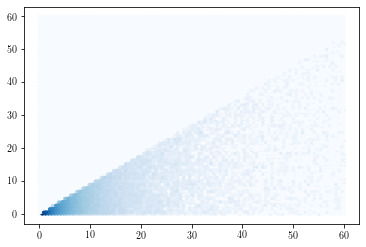

In [222]:
plt.hexbin(np.maximum(m1s,m2s),np.minimum(m1s,m2s),cmap='Blues',extent=(0,60,0,60),bins='log')

(array([33436., 33242., 33307., 33451., 33367., 33526., 33211., 33038.,
        32918., 33292., 33389., 33649., 33463., 33698., 33104., 33370.,
        33192., 33237., 33319., 33486., 33501., 33451., 33156., 33589.,
        33218., 33405., 33176., 33168., 33373., 33268.]),
 array([2.14062299e-07, 3.33334618e-02, 6.66667095e-02, 9.99999571e-02,
        1.33333205e-01, 1.66666453e-01, 1.99999700e-01, 2.33332948e-01,
        2.66666196e-01, 2.99999443e-01, 3.33332691e-01, 3.66665939e-01,
        3.99999186e-01, 4.33332434e-01, 4.66665682e-01, 4.99998929e-01,
        5.33332177e-01, 5.66665425e-01, 5.99998673e-01, 6.33331920e-01,
        6.66665168e-01, 6.99998416e-01, 7.33331663e-01, 7.66664911e-01,
        7.99998159e-01, 8.33331406e-01, 8.66664654e-01, 8.99997902e-01,
        9.33331150e-01, 9.66664397e-01, 9.99997645e-01]),
 <a list of 30 Patch objects>)

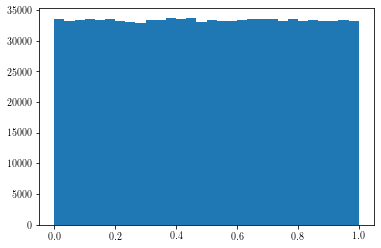

In [187]:
plt.hist(np.minimum(m2s,m1s)/np.maximum(m2s,m1s),bins=30)

In [356]:
# Salpeter IMF, normalized above 0.5 Msun
all_masses = np.linspace(0.5,500.,30000)
dM = all_masses[1] - all_masses[0]
total_masses = np.add.outer(all_masses,all_masses)
p_ms_all = (1.-2.35)*all_masses**(-2.35)/(0.-0.5**(1.-2.35))

high_masses = np.linspace(20,500.,30000)
p_ms_high = (1.-2.35)*high_masses**(-2.35)/(0.-0.5**(1.-2.35))

rate_highMass = SFR*np.trapz(p_ms_high,high_masses)**2./(p_ms_all.T.dot(total_masses).dot(p_ms_all)*dM**2)
net_efficiency = 20./rate_highMass
print(rate_highMass)
print(net_efficiency)

1273.055182569172
0.015710238074391793


In the common envelope paradigm, let's break this down into a few different factors:

$$
f = f_{\rm SN1} \times f_{\rm CE} \times f_{\rm SN2} \times f_{\rm Merge}
$$

Pieces are:
* $f_{\rm SN1}$: Fraction of binaries that avoid disruption in the primary's supernova
* $f_{\rm CE}$: Of those binaries that survive SN1, the fraction that successfully initiate CE and **do not** promptly merge
* $f_{\rm SN2}$: Of those binaries that survive CE, the fraction that avoid disruption in the secondary's supernova
* $f_{\rm Merge}$: Of those binaries that survive SN2, the fraction that merge via GW emission in under a Hubble time.

In [3]:
binaries,trials,numSN,numMerge,success = getPopRecursion(500,1.,0.3,0.2,10.*np.pi/180.,'maxwellian',[100,100])

In [6]:
fTot = 500./trials
fSN2 = numSN/trials
fMerge = fTot/fSN2
print(fSN2,fMerge,fTot,fSN2*fMerge)

NameError: name 'trials' is not defined

In [301]:
vs = np.logspace(2,np.log10(6000.),60)
fSN2s = np.zeros(vs.size)
fMerges = np.zeros(vs.size)

for i,v in enumerate(vs):
    
    binaries,trials,numSN,numMerge,success = getPopRecursion(1000,1.,0.3,0.2,10.*np.pi/180.,'maxwellian',[v,v],0.9,
                                                            efficiencyThreshold=1e-4)
    if success==False:
        print("!!!")
    
    fTot = binaries.size*1./trials
    fSN2 = numSN*1./trials
    fMerge = fTot/fSN2 
    
    fSN2s[i] = fSN2
    fMerges[i] = fMerge
    print(v,fSN2,fMerge,fTot,np.sqrt(fTot*(1-fTot)/trials))

100.0 0.7306666666666667 0.4575729927007299 0.3343333333333333 0.008613062861250452
107.18602287788791 0.7036666666666667 0.502131691141639 0.35333333333333333 0.00872713944903844
114.88843500379099 0.66425 0.48626270229582236 0.323 0.007393764264567813
123.1443442272108 0.655 0.5170483460559796 0.33866666666666667 0.008640438946325886
131.9935249762032 0.629 0.5123211446740858 0.32225 0.00738926480612246
141.4786098783237 0.60325 0.5329465395772898 0.3215 0.007384743563591088
151.64529515149783 0.585 0.5572649572649573 0.326 0.007411545048098945
162.5425607543251 0.548 0.5871350364963502 0.32175 0.007386253067354245
174.2229063564356 0.525 0.58 0.3045 0.007276327198525365
186.7426042657303 0.49325 0.5950329447541813 0.2935 0.007199960937394036
200.16197053102937 0.46575 0.6183574879227053 0.288 0.007159888267284623
214.54565552622017 0.433 0.6460739030023095 0.27975 0.007097357562853939
229.96295541584894 0.417 0.6606714628297363 0.2755 0.007063988781134919
246.48814600269904 0.39975 

./../makePop_while.py:126: RuntimeWarning: divide by zero encountered in double_scalars
  surviveSN += np.where(survived==1)[0].size


4240.923772971902 0.0012447795823665893 0.9319664492078285 0.001160092807424594 3.666407030272675e-05
4545.67752553145 0.001031132075471698 0.9167429094236049 0.0009452830188679246 2.9848508367682748e-05
4872.330952471143 0.0008554313099041534 0.9337068160597571 0.0007987220447284345 2.524771978796843e-05
5222.457769402134 0.0006965428937259923 0.9191176470588236 0.0006402048655569782 2.0238573913777655e-05
5597.7447794994 0.0005860243515087348 0.903342366757001 0.0005293806246691371 1.673605360032495e-05
6000.000000000003 0.0004839729119638826 0.933768656716418 0.00045191873589164785 1.4280557199450275e-05


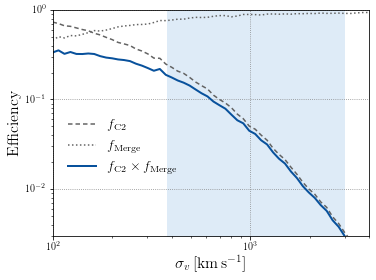

In [355]:
fig,ax = plt.subplots(figsize=(5.33,4))

ax.plot(vs,fSN2s,color='#636363',dashes=(3,2),label=r'$f_{\rm C2}$',lw=1.5)
ax.plot(vs,fMerges,color='#636363',ls=':',label=r'$f_{\rm Merge}$',lw=1.5)
ax.plot(vs,fSN2s*fMerges,label=r'$f_{\rm C2} \times f_{\rm Merge}$',lw=2,color='#08519c')

ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.grid(True,which='major',ls=':',color='grey')
ax.yaxis.grid(True,which='major',ls=':',color='grey')
ax.set_xlabel(r'$\sigma_v\,[\mathrm{km}\,\mathrm{s}^{-1}]$',fontsize=16)
ax.set_ylabel(r'Efficiency',fontsize=16)

maxwellian_samps = np.load('../output/processed_emcee_samples_maxwellian_beta0.9_perfectAlignment.npy')[()]
sigMaxwellian = 10.**maxwellian_samps[:,0]
lowKick = np.quantile(sigMaxwellian,0.05)
highKick = np.quantile(sigMaxwellian,0.95)
ax.fill_betweenx([1e-3,1],lowKick,highKick,zorder=-1,color='#deebf7')

ax.set_xlim(100,4e3)
ax.set_ylim(3e-3,1)
ax.legend(loc=(0.03,0.25),fontsize=14,frameon=False)

plt.tight_layout()
plt.savefig('efficiency.pdf',bbox_inches='tight')
plt.show()

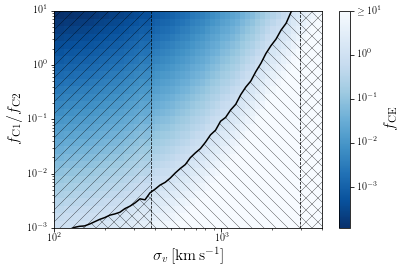

In [354]:
fCE_times_epsilon = net_efficiency/(fSN2s**2.*fMerges)

fig,ax = plt.subplots(figsize=(6,4))

eps = np.logspace(-3,1,30) # f1/f2

colors = np.log10(np.array([fCE_times_epsilon/e for e in eps]))
c = ax.pcolormesh(vs,eps,colors,cmap='Blues_r',vmax=1.)
ax.axvline(x=lowKick,ls='--',color='black',lw=0.75)
ax.axvline(x=highKick,ls='--',color='black',lw=0.75)

ax.fill_betweenx([1e-3,10],0,lowKick,facecolor="none",hatch='//',edgecolor='black',linewidth=0.0)
ax.fill_betweenx([1e-3,10],highKick,1e4,facecolor="none",hatch='//',edgecolor='black',linewidth=0.0)
ax.fill_between(vs,1e-3,fCE_times_epsilon,facecolor="none",hatch='\\\\',edgecolor='black',linewidth=0.0)

ax.plot(vs,fCE_times_epsilon,color='black')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\sigma_v\,[\mathrm{km}\,\mathrm{s}^{-1}]$',fontsize=16)
ax.set_ylabel(r'$f_\mathrm{C1}/f_\mathrm{C2}$',fontsize=16)
ax.set_xlim(1e2,4e3)
ax.set_ylim(1e-3,10)

cbar = fig.colorbar(c)
cbar.set_ticks([-3,-2,-1,0,1])
cbar.set_ticklabels(np.concatenate([["$10^{{{0}}}$".format(x) for x in [-3,-2,-1,0]],["$\geq 10^1$"]]))
cbar.set_label('$f_{\mathrm{CE}}$',fontsize=16)
plt.savefig('./CE_efficiency.pdf',bbox_inches='tight')
plt.show()

In [345]:
print(np.interp(sigmaUpperBound,vs,fCE))

19.841709893811675


In [343]:
sigmaLowerBound = lowKick
sigmaUpperBound = highKick

with open('efficiency-macros.txt','w') as outfile:
    
    outfile.write("\\newcommand{{\\fSNTwoupper}}{{{0:.2f}}}\n".format(np.interp(sigmaLowerBound,vs,fSN2s)))
    outfile.write("\\newcommand{{\\fSNTwolower}}{{{0:.3f}}}\n".format(np.interp(sigmaUpperBound,vs,fSN2s)))
    outfile.write("\\newcommand{{\\fMergelower}}{{{0:.2f}}}\n".format(np.interp(sigmaLowerBound,vs,fMerges)))
    outfile.write("\\newcommand{{\\fMergeupper}}{{{0:.2f}}}\n".format(np.interp(sigmaUpperBound,vs,fMerges)))
    outfile.write("\n")   
    
    efficiencyLimit = np.interp(1.,fCE,vs)
    outfile.write("\\newcommand{{\\sigmaEfficiencyLimit}}{{{0:.1f}}}\n".format(efficiencyLimit))
    outfile.write("\\newcommand{{\\fMergeupperRestricted}}{{{0:.2f}}}\n".format(np.interp(efficiencyLimit,vs,fMerges)))
    outfile.write("\\newcommand{{\\fSNTwolowerRestricted}}{{{0:.2f}}}\n".format(np.interp(efficiencyLimit,vs,fSN2s)))
    
    outfile.write("\n")
    outfile.write("\\newcommand{{\\fCELowerLimit}}{{{0:.3f}}}\n".format(np.interp(sigmaLowerBound,vs,net_efficiency/(fSN2s**2*fMerges))))

21.940267259051993
245.10108385020888


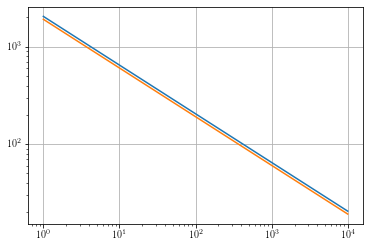

In [413]:
alpha = -2.2
beta = 1.3
Ntot = 100000
m1s = np.power(np.random.random(Ntot)*(75.**(1.+alpha)-5.**(1.+alpha))+5.**(1.+alpha),1./(1.+alpha))
m2s = np.power(np.random.random(Ntot)*(m1s**(1.+beta)-5.**(1.+beta))+5.*(1.+beta),1./(1.+beta))
Rs = 10.**(np.random.random(Ntot)*(np.log10(300.)-np.log10(5.))+np.log10(5.))*Rsun

mu = m1s*m2s/(m1s+m2s)

G = 6.67e-11
Rsun = 6.96e8
Msun = 2e30
mean_M = np.mean(m1s+m2s)*2e30
print(mean_M/Msun)
print(np.sqrt(G*np.mean(m1s+m2s)*Msun/(70.*Rsun))/1e3)

rs = np.logspace(0,4,1000)

fig,ax = plt.subplots()
ax.plot(rs,np.sqrt(G*mean_M/(rs*Rsun))/1e3)
ax.plot(rs,mean_sqrtM*np.sqrt(G/(rs*Rsun))/1e3)
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(True)
plt.show()

In [389]:
vx = np.random.normal(loc=0,scale=1,size=1000)
vy = np.random.normal(loc=0,scale=1,size=1000)
vz = np.random.normal(loc=0,scale=1,size=1000)
print(np.mean(np.sqrt(vx**2+vy**2+vz**2)))

1.6144174251433503


0.04808743631230315

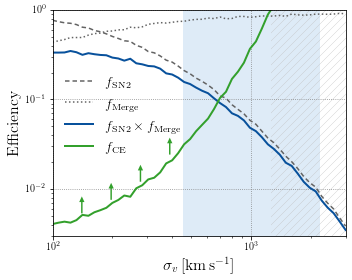

In [123]:
fig,ax = plt.subplots(figsize=(5,4))

ax.plot(vs,fSN2s,color='#636363',dashes=(3,2),label=r'$f_{\rm SN2}$',lw=1.5)
ax.plot(vs,fMerges,color='#636363',ls=':',label=r'$f_{\rm Merge}$',lw=1.5)
ax.plot(vs,fSN2s*fMerges,label=r'$f_{\rm SN2} \times f_{\rm Merge}$',lw=2,color='#08519c')

fCE = net_efficiency/(fSN2s**2.*fMerges)
ax.plot(vs,fCE,lw=2,color='#33a02c',label=r'$f_{\rm CE}$')
#ax.axvline(x=np.interp(1.,fCE,vs),color='grey')
ax.fill_betweenx([1e-3,1],np.interp(1.,fCE,vs),5e3,facecolor="none",hatch='///',edgecolor='#bdbdbd',linewidth=0.0)

ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.grid(True,which='major',ls=':',color='grey')
ax.yaxis.grid(True,which='major',ls=':',color='grey')
ax.set_xlabel(r'$\sigma_v\,[\mathrm{km}\,\mathrm{s}^{-1}]$',fontsize=16)
ax.set_ylabel(r'Efficiency',fontsize=16)
ax.fill_betweenx([1e-3,1],1010-555.,1010+1184,zorder=-1,color='#deebf7')
ax.set_xlim(100,3e3)
ax.set_ylim(3e-3,1)
ax.legend(loc=(0.025,0.34),fontsize=14,frameon=False)

hl=0.025
hw=0.018
aw=0.005
plt.arrow(0.1,0.1,0.0,0.05,head_length=hl,head_width=hw,width=aw,transform=ax.transAxes,color='#33a02c',linewidth=0)
plt.arrow(0.2,0.16,0.0,0.05,head_length=hl,head_width=hw,width=aw,transform=ax.transAxes,color='#33a02c',linewidth=0)
plt.arrow(0.3,0.24,0.0,0.05,head_length=hl,head_width=hw,width=aw,transform=ax.transAxes,color='#33a02c',linewidth=0)
plt.arrow(0.4,0.36,0.0,0.05,head_length=hl,head_width=hw,width=aw,transform=ax.transAxes,color='#33a02c',linewidth=0)

plt.tight_layout()
plt.savefig('efficiency.pdf',bbox_inches='tight')
plt.show()

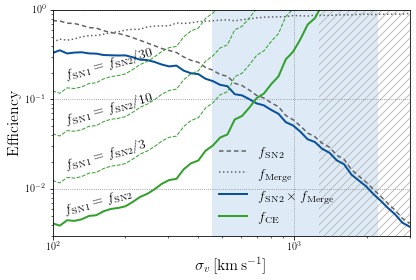

In [34]:
fig = plt.figure(figsize=(11,4))

ax = fig.add_subplot(121)
ax.plot(vs,fSN2s,color='#636363',dashes=(3,2),label=r'$f_{\rm SN2}$',lw=1.5)
ax.plot(vs,fMerges,color='#636363',ls=':',label=r'$f_{\rm Merge}$',lw=1.5)
ax.plot(vs,fSN2s*fMerges,label=r'$f_{\rm SN2} \times f_{\rm Merge}$',lw=2,color='#08519c')

fCE = net_efficiency/(fSN2s**2.*fMerges)
ax.plot(vs,fCE,lw=2,color='#33a02c',label=r'$f_{\rm CE}$')
ax.plot(vs,fCE*3,lw=1,color='#33a02c',ls='--')
ax.plot(vs,fCE*10,lw=1,color='#33a02c',ls='--')
ax.plot(vs,fCE*30,lw=1,color='#33a02c',ls='--')
#ax.axvline(x=np.interp(1.,fCE,vs),color='grey')
ax.fill_betweenx([1e-3,1],np.interp(1.,fCE,vs),5e3,facecolor="none",hatch='///',edgecolor='#bdbdbd',linewidth=0.0)

ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.grid(True,which='major',ls=':',color='grey')
ax.yaxis.grid(True,which='major',ls=':',color='grey')
ax.set_xlabel(r'$\sigma_v\,[\mathrm{km}\,\mathrm{s}^{-1}]$',fontsize=16)
ax.set_ylabel(r'Efficiency',fontsize=16)
ax.fill_betweenx([1e-3,1],1010-555.,1010+1184,zorder=-1,color='#deebf7')
ax.set_xlim(100,3e3)
ax.set_ylim(3e-3,1)
#ax.legend(loc=(0.025,0.34),fontsize=14,frameon=False)
ax.legend(loc=(0.45,0.03),fontsize=14,frameon=False)

ax.text(0.03,0.1,'$f_\mathrm{SN1} = f_\mathrm{SN2}$',transform=ax.transAxes,rotation=15.,fontsize=14)
ax.text(0.03,0.3,'$f_\mathrm{SN1} = f_\mathrm{SN2}/3$',transform=ax.transAxes,rotation=15.,fontsize=14)
ax.text(0.03,0.5,'$f_\mathrm{SN1} = f_\mathrm{SN2}/10$',transform=ax.transAxes,rotation=15.,fontsize=14)
ax.text(0.03,0.7,'$f_\mathrm{SN1} = f_\mathrm{SN2}/30$',transform=ax.transAxes,rotation=15.,fontsize=14)

plt.tight_layout()
plt.savefig('efficiency_alt.pdf',bbox_inches='tight')
plt.show()

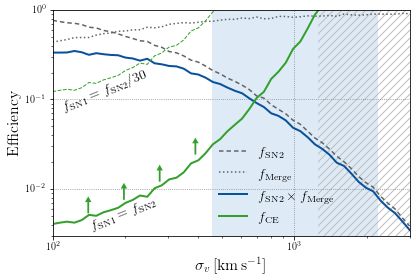

In [27]:
fig = plt.figure(figsize=(11,4))

ax = fig.add_subplot(121)
ax.plot(vs,fSN2s,color='#636363',dashes=(3,2),label=r'$f_{\rm SN2}$',lw=1.5)
ax.plot(vs,fMerges,color='#636363',ls=':',label=r'$f_{\rm Merge}$',lw=1.5)
ax.plot(vs,fSN2s*fMerges,label=r'$f_{\rm SN2} \times f_{\rm Merge}$',lw=2,color='#08519c')

fCE = net_efficiency/(fSN2s**2.*fMerges)
ax.plot(vs,fCE,lw=2,color='#33a02c',label=r'$f_{\rm CE}$')
ax.plot(vs,fCE*30,lw=1,color='#33a02c',ls='--')
#ax.axvline(x=np.interp(1.,fCE,vs),color='grey')
ax.fill_betweenx([1e-3,1],np.interp(1.,fCE,vs),5e3,facecolor="none",hatch='///',edgecolor='#bdbdbd',linewidth=0.0)

ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.grid(True,which='major',ls=':',color='grey')
ax.yaxis.grid(True,which='major',ls=':',color='grey')
ax.set_xlabel(r'$\sigma_v\,[\mathrm{km}\,\mathrm{s}^{-1}]$',fontsize=16)
ax.set_ylabel(r'Efficiency',fontsize=16)
ax.fill_betweenx([1e-3,1],1010-555.,1010+1184,zorder=-1,color='#deebf7')
ax.set_xlim(100,3e3)
ax.set_ylim(3e-3,1)
#ax.legend(loc=(0.025,0.34),fontsize=14,frameon=False)
ax.legend(loc=(0.45,0.03),fontsize=14,frameon=False)

ax.text(0.1,0.03,'$f_\mathrm{SN1} = f_\mathrm{SN2}$',transform=ax.transAxes,rotation=22.,fontsize=14)
ax.text(0.02,0.56,'$f_\mathrm{SN1} = f_\mathrm{SN2}/30$',transform=ax.transAxes,rotation=22.,fontsize=14)

hl=0.025
hw=0.018
aw=0.005
plt.arrow(0.1,0.1,0.0,0.05,head_length=hl,head_width=hw,width=aw,transform=ax.transAxes,color='#33a02c',linewidth=0)
plt.arrow(0.2,0.16,0.0,0.05,head_length=hl,head_width=hw,width=aw,transform=ax.transAxes,color='#33a02c',linewidth=0)
plt.arrow(0.3,0.24,0.0,0.05,head_length=hl,head_width=hw,width=aw,transform=ax.transAxes,color='#33a02c',linewidth=0)
plt.arrow(0.4,0.36,0.0,0.05,head_length=hl,head_width=hw,width=aw,transform=ax.transAxes,color='#33a02c',linewidth=0)



plt.tight_layout()
plt.show()

In [117]:
vMax = np.interp(1.,fCE,vs)
print(vMax)

1279.718159178304


In [118]:
print(np.interp(314.,vs,fCE))
print(np.interp(314.,vs,fSN2s),np.interp(vMax,vs,fSN2s))
print(np.interp(314.,vs,fMerges),np.interp(vMax,vs,fMerges))

0.01392907362472499
0.33574699128528174 0.0350281265496715
0.6668281616964749 0.8554466232672855


In [29]:
G = 6.67e-11
c = 2.998e8
Msun = 1.99e30
Rsun = 7e8

mMax = 75.
mMin = 5.
bq = 1.3
alpha = -2.2
n=3000

# Masses
m1 = np.power((mMax**(1.+alpha)-mMin**(1.+alpha))*np.random.random(n) + mMin**(1.+alpha),1./(1.+alpha))
m2 = np.power((m1**(1.+bq)-mMin**(1.+bq))*np.random.random(n)+mMin**(1.+bq),1./(1.+bq))

# Separation
sep = 10.**(np.log10(5.) + (np.log10(300)-np.log10(5.))*np.random.random(n))*Rsun

np.sqrt(2.*np.mean(G*(m1+m2)*Msun/(2.*sep)))

455265.1806320534

In [ ]:
fig = plt.figure(figsize=(11,4))

ax = fig.add_subplot(121)
ax.plot(vs,fSN2s,color='#636363',dashes=(3,2),label=r'$f_{\rm SN2}$',lw=1.5)
ax.plot(vs,fMerges,color='#636363',ls=':',label=r'$f_{\rm Merge}$',lw=1.5)
ax.plot(vs,fSN2s*fMerges,label=r'$f_{\rm SN2} \times f_{\rm Merge}$',lw=2,color='#08519c')

fCE = net_efficiency/(fSN2s**2.*fMerges)
ax.plot(vs,fCE,lw=2,color='#33a02c',label=r'$f_{\rm CE}$')
#ax.axvline(x=np.interp(1.,fCE,vs),color='grey')
ax.fill_betweenx([1e-3,1],np.interp(1.,fCE,vs),5e3,facecolor="none",hatch='///',edgecolor='#bdbdbd',linewidth=0.0)

ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.grid(True,which='major',ls=':',color='grey')
ax.yaxis.grid(True,which='major',ls=':',color='grey')
ax.set_xlabel(r'$\sigma_v\,[\mathrm{km}\,\mathrm{s}^{-1}]$',fontsize=16)
ax.set_ylabel(r'Efficiency',fontsize=16)
ax.fill_betweenx([1e-3,1],1010-555.,1010+1184,zorder=-1,color='#deebf7')
ax.set_xlim(100,3e3)
ax.set_ylim(3e-3,1)
ax.legend(loc=(0.03,0.3),fontsize=14,frameon=False)

eps=800.
pdfs = 0.4*vs**(-3.)*(-eps*np.exp(-eps**2./(2.*vs**2))*vs**2.+np.sqrt(np.pi/2.)*vs**3.*erf(eps/(np.sqrt(2.)*vs)))
ax.plot(vs,pdfs,ls='--')

plt.tight_layout()
plt.show()

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


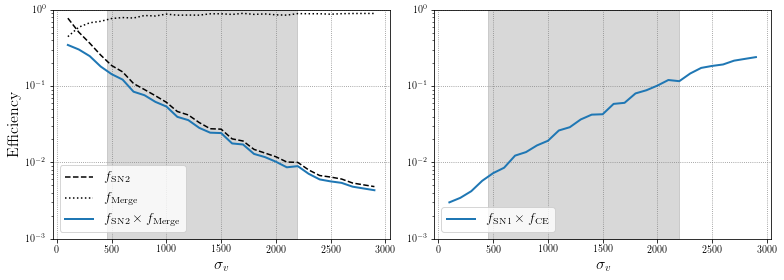

In [7]:
fig = plt.figure(figsize=(11,4))

ax = fig.add_subplot(121)
ax.plot(vs,fSN2s,color='black',ls='--',label=r'$f_{\rm SN2}$')
ax.plot(vs,fMerges,color='black',ls=':',label=r'$f_{\rm Merge}$')
ax.plot(vs,fSN2s*fMerges,label=r'$f_{\rm SN2} \times f_{\rm Merge}$',lw=2)
ax.set_yscale('log')
ax.xaxis.grid(True,which='major',ls=':',color='grey')
ax.yaxis.grid(True,which='major',ls=':',color='grey')
ax.set_xlabel(r'$\sigma_v$',fontsize=16)
ax.set_ylabel(r'Efficiency',fontsize=16)
ax.fill_betweenx([1e-3,1],1010-555.,1010+1184,zorder=-1,color='grey',alpha=0.3)
ax.set_ylim(1e-3,1)
ax.legend(loc='lower left',fontsize=14)

ax = fig.add_subplot(122)
ax.plot(vs,net_efficiency/(fSN2s*fMerges),label=r'$f_{\rm SN1} \times f_{\rm CE}$',lw=2)
ax.set_yscale('log')
ax.xaxis.grid(True,which='major',ls=':',color='grey')
ax.yaxis.grid(True,which='major',ls=':',color='grey')
ax.set_xlabel(r'$\sigma_v$',fontsize=16)
ax.fill_betweenx([1e-3,1],1010-555.,1010+1184,zorder=-1,color='grey',alpha=0.3)
ax.set_ylim(1e-3,1)
ax.legend(loc='lower left',fontsize=14)

plt.tight_layout()
plt.show()

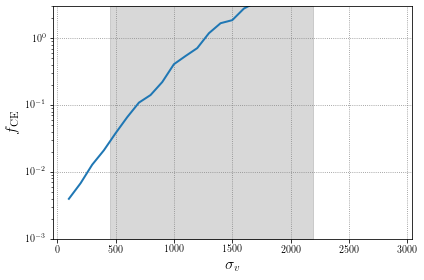

In [45]:
fig = plt.figure(figsize=(6,4))

ax = fig.add_subplot(111)
ax.plot(vs,net_efficiency/(fSN2s**2.*fMerges),lw=2)
ax.set_yscale('log')
ax.xaxis.grid(True,which='major',ls=':',color='grey')
ax.yaxis.grid(True,which='major',ls=':',color='grey')
ax.set_xlabel(r'$\sigma_v$',fontsize=16)
ax.set_ylabel(r'$f_{\rm CE}$',fontsize=16)
ax.fill_betweenx([1e-3,3],1010-555.,1010+1184,zorder=-1,color='grey',alpha=0.3)
ax.set_ylim(1e-3,3)

plt.tight_layout()
plt.show()